In [1]:
!pip install chardet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 6.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
from chardet import detect    
result = detect(open(file='/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv', mode= 'rb').read())
df = pd.read_csv(filepath_or_buffer='/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv', encoding=result['encoding'],
                ).drop(columns=['Status', 'unnamed1'])
df['user_id'] = 'u' + df['User_ID'].astype(str) 
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,user_id
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,u1002903
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,u1000732
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,u1001990
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,u1001425
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,u1000588


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  user_id           11251 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.2+ MB


In [4]:
df.nunique()

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
user_id             3755
dtype: int64

In [5]:
from plotly.express import bar
for column in ['Gender', 'Age Group', 'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders']:
    bar(data_frame=df[column].value_counts().to_frame().reset_index(), x=column, y='count').show()

In [6]:
from plotly.express import histogram
for column in ['Gender', 'Age Group', 'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders']:
    histogram(data_frame=df, x='Amount', color=column).show()

(-0.5, 1199.5, 1199.5, -0.5)

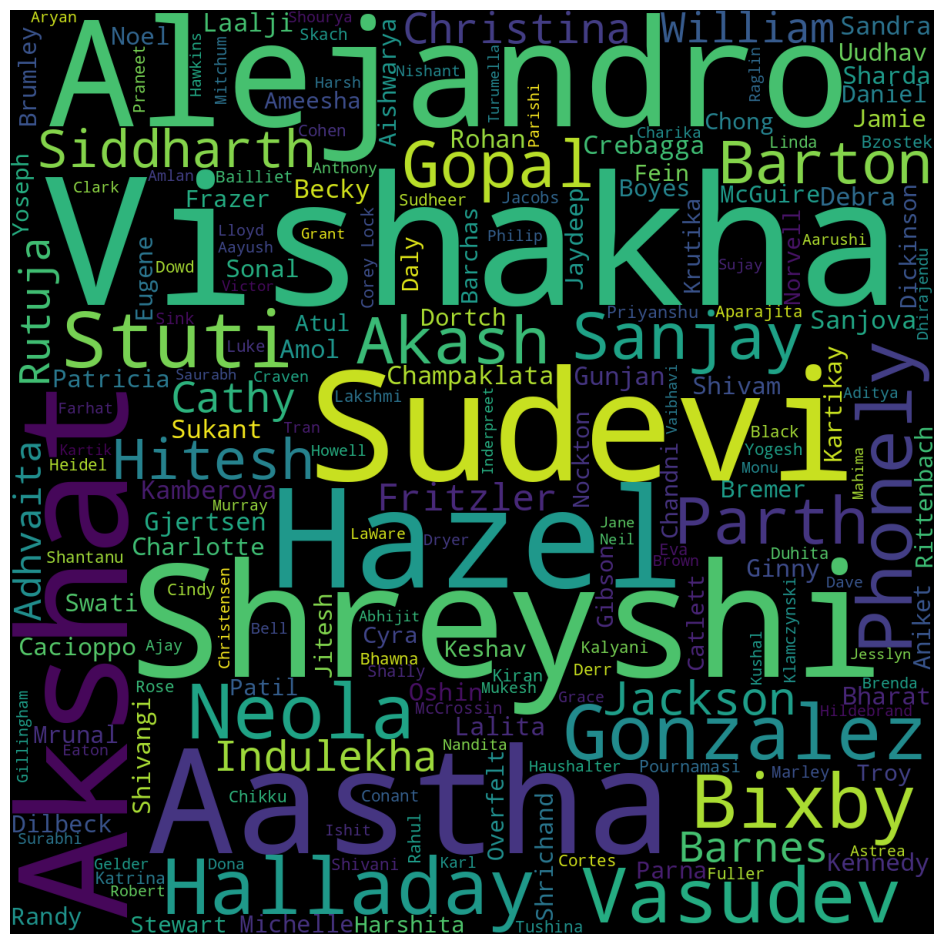

In [7]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['Cust_name'].values), ))
axis('off')

In [8]:
bar(data_frame=df[['Cust_name', 'Amount']].groupby(by='Cust_name').sum().sort_values(ascending=False, by='Amount').reset_index().head(n=20),
    x='Cust_name', y='Amount')

Is this what we would expect? Or do we have multiple customers/users with the same name?

In [9]:
bar(data_frame=df[['user_id', 'Amount']].groupby(by='user_id').sum().sort_values(ascending=False, by='Amount').reset_index().head(n=20),
    x='user_id', y='Amount')

If we break out the total sales by user ID we see a different top twenty; let's combine the two to try to disambiguate names from IDs.

In [10]:
bar(data_frame=df[['user_id', 'Cust_name', 'Amount']].groupby(by=['user_id',
                                                                  'Cust_name']).sum().reset_index().sort_values(ascending=False,
                                                                                                                by='Amount').head(n=25),
    x='Cust_name', y='Amount')

We have two Vishakhas who are big spenders. Hooray!

In [11]:
for column in ['Gender', 'Age Group', 'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category', ]:
    bar(data_frame=
        df[[column, 'Amount']].groupby(by=column).mean().reset_index(), x=column, y='Amount').show()

In [12]:
from plotly.express import scatter
scatter(data_frame=df, x='Age', y='Amount', color='Zone', height=1000, hover_name='Cust_name')